# Apprentissage supervisé

On parle d'apprentissage supervisé lorsqu'on infère la relation entre des variables explicatives (caractéristiques, features) et une variable à expliquer (cible). Il permet réaliser deux types de tache : 
                            
* **Régression** : Lorsque la variable à expliquer est quantitative
  * Exemple :
      * Prévoir le prix d'un bien immobilier
      * Prédire le cours de la bourse
* **Classification** : Lorsque la variable à expliquer est la qualitative
  * Exemple :
      * Détecter les spam
      * Identifier les transactions frauduleuses
                   
L'utilisation de l'apprentissage supervisé est pertinente lorsque :
* La compréhension du phénomène étudié (physique, économique, ...) est insuffisante
* On ne dispose pas de modèle analytique permettant de faire de prévisions avec une précision acceptable.


## Quelques méthodes statistiques

### Régression linéaire

La régression linéaire cherche une relation linéaire entre une variable à expliquer et une ou plusieurs variables explicatives. Elle est dite simple lorsqu'on a une seule variable explicative sinon elle est dite multiple.

<img src="https://latex.codecogs.com/gif.latex?Y_i = \sum_{j=0}^n a_jX_{ij} + \epsilon_i " /> 

Avec :
* <img src="https://latex.codecogs.com/gif.latex?\epsilon_i" align=left> : écarts entre les valeurs réalisées et les valeurs prédites
* <img src="https://latex.codecogs.com/gif.latex?X_{ij}" align=left> : les données observées
* <img src="https://latex.codecogs.com/gif.latex?Y_{i}" align=left> : la variable à modéliser

Cette modélisation suppose que les Ɛ<sub>i</sub> sont iid et centrées et réduites. Les coefficients a<sub>j</sub> sont estimés avec méthode du maximum de vraisemblance.

### Régression logistique

Lorsque la variable à prédire `Y` est binaire, la régression linéaire n'est plus applicable directement car la prédiction d'un modèle linéaire n'est pas binaire (explique une variable quantitative). Une adaptation du modèle linéaire s'impose, et dans ce cas on cherche plutôt à modéliser :
* <img src="https://latex.codecogs.com/gif.latex?p= P(Y = 1)" align=left>
* <img src="https://latex.codecogs.com/gif.latex?1 - p= P(Y = 0)" align=left>
* Ou une transformation de ces probabilités

La transformation **Logit** est souvent utilisée : 

<img src="https://latex.codecogs.com/gif.latex?g(p) = logit(p) = ln(\frac{p}{1 - p}) \text{  et son inverse   } f(x) = \frac{e^x}{1 + e^x} " /> 

<img src="https://latex.codecogs.com/gif.latex?logit(p_i) = \sum_{j=0}^n a_jX_{ij} " /> 

Les paramètres du modèle sont estimés par la méthode du maximum de vraisemblance. Il est possible d'avoir les intervalles de confiance pour chaque paramètre ainsi que celui de `p`


###  Arbres de classification et régression (CART )

Il s'agit des arbres binaires de décision proposées par **Breiman**. Les variables quantitatives sont discrétisées pour avoir des tests binaires. C'est une méthode non paramétrique pour modéliser des problèmes de classification et de régression.
Concrètement un arbre binaire de décision est une représentation hiérarchique de la structure des données sous forme des séquences de décisions en vue de la prédiction d'un résultat ou d'une classe. La qualité d'une division d'un nœud est évaluée à l'aide d'une mesure d'impureté (exemple : gini ou entropie pour la classification, risque quadratique pour la régression)

Pour réaliser une prédiction, on parcourt l'arbre jusqu'à un nœud final (feuille), la valeur prédite est :
* La classe majoritaire dans la feuille s'il s'agit d'une classification
* La moyenne des valeurs réalisées dans la feuille pour une régression


### Support Vecteur Machine (SVM)

Les SVM sont méthodes d'apprentissage statistique initialement développés pour réaliser des taches de classification. Mais il existe également une version de cette méthode pour traiter les problèmes de régression. Les SVM reposent sur l'idée de trouver un hyperplan qui sépare au mieux les données.

Le principe des SVM est de trouver hyperplan optimal qui maximise la marge (distance entre l'hyperplan et les points de chaque classe qui lui sont le plus proche).

Les SVM tel que défini permet de résoudre un problème de classification avec des données séparable linéairement. Cependant il est souvent possible de réaliser des transformations de variables permettant de rendre linéairement séparable un problème qui ne l'est pas dans l’espace initial. Ce changement d'espace est effectué à l'aide de noyau.


### Régression quantile

La majorité des études de modélisation se focalise sur la moyenne conditionnelle. La moyenne apporte une information essentielle mais néanmoins limitée car elle est très sensible aux valeurs extrêmes ou aberrantes, données manquantes, ...

La régression quantile est un outil de pour répondre à ces limites inhérentes à la moyenne. Elle propose une estimation de quantiles conditionnels au lieu d'une moyenne conditionnelle. Ainsi, la Régression Quantile permet une analyse qui correspond plus à la réalité.

<img src="https://latex.codecogs.com/gif.latex?q_{\tau}(Y/X) = \sum_{j=0}^n a_jX_{ij} " /> 

### Classifieur naif de Bayes

Le classifieur bayésien naïf est une technique d'apprentissage supervisé basée sur une hypothèse forte selon laquelle les variables explicatives sont deux à deux indépendants conditionnellement aux valeurs de la variable à prédire. La classification bayésienne calcule explicitement les probabilités à posteriori de chaque classe avec la règle de Bayes. Chaque nouvel individu est affecté à la classe la plus probable.

### K plus proches voisins

Le principe de cette méthode est simple et consiste à attribuer un individu :
* Classification la classe la plus représentée parmi ses `k` plus proches voisins
* Régression : moyenne des valeurs réalisées par ses `k` plus proches voisins

## Applications

### 1. Classification : Score d'appétence d'un produit bancaire 

Les données proviennent du github de Wikistat. Pour avoir des informations sur les variables, vous pouvez regarder [ici](https://github.com/wikistat/Apprentissage/blob/master/GRC-carte_Visa/Apprent-Python-Visa.ipynb).

**Note :** L'objectif est de montrer comment mettre en oeuvre les algorithmes de classification. On ne cherchera pas à comparer les modèles. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.metrics import (confusion_matrix, classification_report)
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

sns.set()
set_config(display='diagram')
random_seed = 12345

def plot_perf(true_Y, pred_Y):
    rcParams['figure.figsize'] = 10, 5

    conf_matrix = confusion_matrix(true_Y, pred_Y)
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    clf_report = classification_report(test_Y, pred_Y, target_names=target_names, output_dict=True)
    clf_report = {name : clf_report[name] for name in target_names}
    _ = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cbar=False,  ax=ax1)
    ax1.set_title("Précision - Recall - F1-score")


    sns.heatmap(conf_matrix, xticklabels=target_names, 
                yticklabels=target_names, annot=True, fmt=".2f", cbar=False, ax=ax2)
    ax2.set_title('Matrice de confusion')
    ax2.set_xlabel('Valeurs réalisées')
    _ = ax2.set_ylabel('Valeurs prédites')

target_names = ["Non", "Oui"]

data = pd.read_table("data/vispremv.dat", sep=' ')
data.columns = data.columns.str.upper()
target = 'CARVP'
categorical_features = [feature for feature, dtype in  data.dtypes.to_dict().items() if dtype == object and feature != target]

numeric_features = [feature for feature, dtype in  data.dtypes.to_dict().items() if dtype != object and feature != target]

cat_features = [key for key, value in enumerate(data.columns.to_list()) if value in categorical_features]

data['CARVP'] = data['CARVP'].map(lambda x : 0 if x == 'Cnon' else 1)

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

train, test = train_test_split(data, test_size=0.2, random_state=0)
train_Y = train[target]
preprocessor.fit(train)
train_X = preprocessor.transform(train)

test_Y = test[target]
test_X = preprocessor.transform(test)

predictions = {}

**Régression Logistique**

* **penalty :** Norme de régularisation exemple : `l1`, `l2`, `elasticnet`, `none`
* **max_iter :** nombre d'itérations
* **solver :** Solveur pour l'optimisation des coefficients
* **fit_intercept :** True pour calculer l'ordonnée à l'origine  

Wall time: 1.79 s


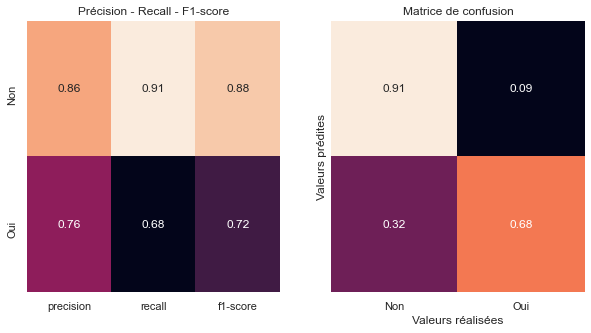

In [2]:
%%time
from sklearn.linear_model import LogisticRegression

param_grid = {
              "penalty": ['l1', 'l2', 'elasticnet'],
              "fit_intercept": [True, False],
              "C": [0.5, 1, 5]
             }

model = GridSearchCV(LogisticRegression(random_state=random_seed, max_iter=1000), param_grid, cv=3, n_jobs=3)
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
plot_perf(test_Y, pred_Y)
predictions['LOGIT'] = model.predict_proba(test_X)[:, 1]

In [3]:
model.best_estimator_

LogisticRegression(C=1, fit_intercept=False, max_iter=1000, random_state=12345)

**SVM**
* **C :** Paramètre de régularisation. The strength of the regularization is inversely proportional to C. 
* **kernel :** Le noyau à utiliser, exemple : `linear`, `poly`, `rbf`, `sigmoid`.
* **gamma :** Le coefficient Gamma pour les noyaux `poly`, `rbf`, `sigmoid` [voir](https://scikit-learn.org/stable/modules/svm.html#shrinking-svm).
* **max_iter :** Nombre d'itérations

Wall time: 1.1 s


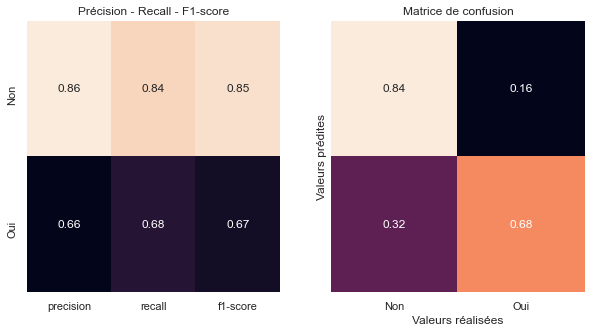

In [4]:
%%time
from sklearn.svm import SVC

param_grid = {
              "kernel": ['linear', 'sigmoid', 'rbf'],
              "C": [0.5, 1, 5]
             }

model = GridSearchCV(SVC(random_state=random_seed, max_iter=1000, probability=True), param_grid, cv=3, n_jobs=3)
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
plot_perf(test_Y, pred_Y)
predictions['SVM'] = model.predict_proba(test_X)[:, 1]

In [5]:
model.best_estimator_

SVC(C=0.5, kernel='linear', max_iter=1000, probability=True, random_state=12345)

**Arbre de décision**

* **criterion :** : Critère pour mesurer la qualité d'une division
* **max_depth :** : Profondeur maximal de l'arbre
* **min_samples_split :** Nombre minimal d'individu à partir un neoud peut-être diviser
* **min_samples_leaf :** Nombre minimal d'individu pour qu'un neoud puisse être considéré comme une feuille
* **max_features :** Nombre maximal de variables à considérer pour diviser un noeud

Wall time: 678 ms


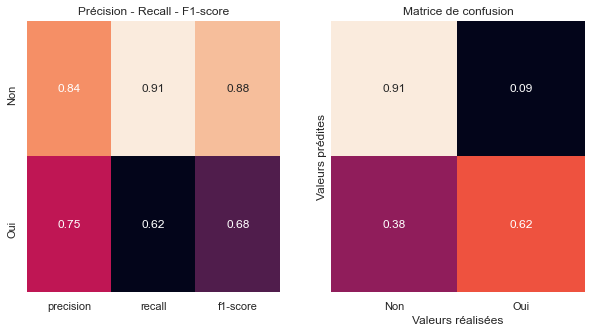

In [6]:
%%time
from sklearn.tree import DecisionTreeClassifier


param_grid = {
              "criterion": ["gini", "entropy"],
              "max_features": [0.5, 0.8],
              "max_depth" : [5, 7, 10],
              "min_samples_leaf" : [2, 4, 6],
              "min_samples_split" : [2, 4]   
             }
model = GridSearchCV(DecisionTreeClassifier(random_state=random_seed), param_grid, cv=3, n_jobs=3)
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
plot_perf(test_Y, pred_Y)
predictions['DT'] = model.predict_proba(test_X)[:, 1]

In [7]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       min_samples_leaf=4, random_state=12345)

**Classifieur naif de Bayes**

Wall time: 101 ms


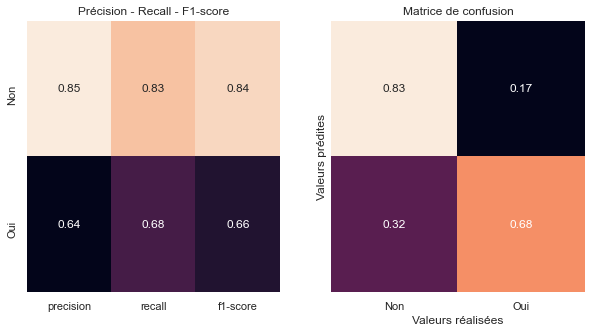

In [8]:
%%time
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
plot_perf(test_Y, pred_Y)
predictions['CNB'] = model.predict_proba(test_X)[:, 1]

**Réseaux de neuronnes : Perceptron multi-couche**

* **hidden_layer_sizes :** le nombre de neurones dans les couches cachées
* **activation :** Fonction de d'activation : `identity`, `logistic`, `tanh`, `relu` 
* **solver :** Solveur pour l'optimisation des poids : (`lbfgs`, `sgd`, `adam`)
* **alpha :**  Paramètre pour la régularisation L2
* **batch_size :** Taille des batchs
* **validation_fraction :** Proportion  des données d'apprentissage à utiliser comme échantillon de validation
* **early_stopping :** Arrêter le training dès que le score commence à se dégrader sur l'échantillon de validation

Wall time: 3.78 s


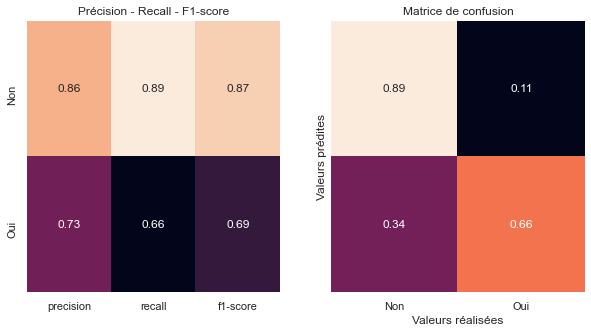

In [9]:
%%time

from sklearn.neural_network import MLPClassifier

param_grid = {
              "alpha": [0.0001, 0.001, 0.01, 0.1],
              "activation" : ['relu', 'logistic'],
              "learning_rate" : ['constant', 'adaptive']
             }

model = GridSearchCV(MLPClassifier(random_state=12345,
                                  early_stopping=True, 
                                  validation_fraction=0.2,
                                  max_iter=500),
                     param_grid,
                     cv=3,
                     n_jobs=3)
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
plot_perf(test_Y, pred_Y)
predictions['MLP'] = model.predict_proba(test_X)[:, 1]

In [10]:
model.best_estimator_

MLPClassifier(alpha=0.1, early_stopping=True, max_iter=500, random_state=12345,
              validation_fraction=0.2)

**K plus proches voisins**

* **n_neighbors :** le nombre de voisins
* **algorithm :** algorithme à utiliser pour calculer les K plus proches voisins
* **weights :** les poids pour pondèrer les prédictions 

Wall time: 428 ms


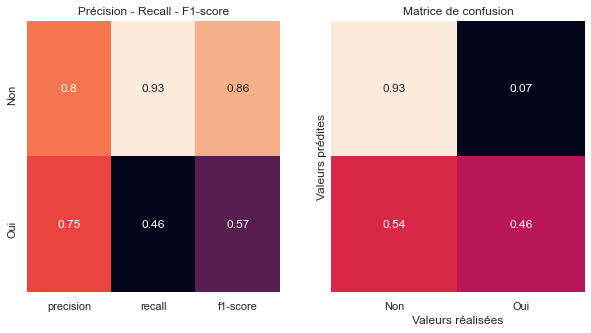

In [11]:
%%time

from sklearn.neighbors import KNeighborsClassifier

param_grid = {
              "n_neighbors": [3, 6, 9],
              "weights": ['uniform', 'distance'],
              "p" : [1, 2]
             }

model = GridSearchCV(KNeighborsClassifier(),
                     param_grid,
                     cv=3,
                     n_jobs=3)
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
plot_perf(test_Y, pred_Y)
predictions['KPV'] = model.predict_proba(test_X)[:, 1]

In [12]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

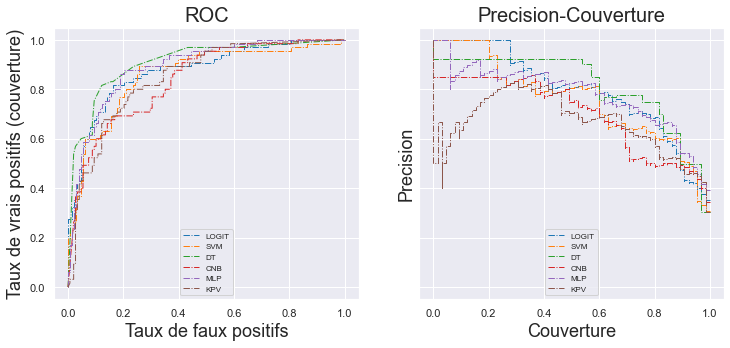

In [13]:
from matplotlib import cm
from sklearn.metrics import roc_curve, precision_recall_curve

def plot_performances(y_true, predictions):
    gradient = np.linspace(0, 1, 10)
    color_list = [ cm.tab10(x) for x in gradient ]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5),
                         sharex=True, sharey=True)
    ax = axes[0]
    idx = 0
    for key, value in predictions.items():
        fpr, tpr, _ = roc_curve(y_true, value)
        ax.plot(fpr, tpr, linestyle='-.', c=color_list[idx], lw=1, label=key)
        idx = idx + 1

    ax.set_title("ROC", fontsize=20)
    ax.set_xlabel('Taux de faux positifs', fontsize=18)
    ax.set_ylabel('Taux de vrais positifs (couverture)', fontsize=18)
    ax.legend(loc='lower center', fontsize=8)

    ax = axes[1]
    idx = 0
    for key, value in predictions.items():
        precision, recall, _ = precision_recall_curve(y_true, value)
        ax.step(recall, precision, linestyle='-.', c=color_list[idx], lw=1, where='post', label=key)
        idx = idx + 1
    ax.set_title("Precision-Couverture", fontsize=20)
    ax.set_xlabel('Couverture', fontsize=18)
    ax.set_ylabel('Precision', fontsize=18)
    ax.legend(loc='lower center', fontsize=8)
    plt.show()
    
plot_performances(test_Y, predictions)

### 2. Régression : Prévision du pic d'ozone

Les données proviennent du github de Wikistat. Pour avoir des informations sur les variables, vous pouvez regarder [ici](https://github.com/wikistat/Apprentissage/blob/master/Pic-ozone/Apprent-Python-Ozone.ipynb).

**Note :** L'objectif est de montrer comment mettre en oeuvre les algorithmes de régression. On ne cherchera pas à comparer les modèles. 

In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

sns.set()
set_config(display='diagram')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from math import sqrt, log

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('data/depSeuil.txt', sep=",")
data.columns = data.columns.str.upper()
data["STATION"] = pd.Categorical(data["STATION"], ordered=False)
data["JOUR"] = pd.Categorical(data["JOUR"], ordered=False)
data["O3OBS"] = pd.DataFrame(data["O3OBS"], dtype=np.float64)

data["SRMH2O"] = data["RMH2O"].map(lambda x: sqrt(x))
data["LNO2"] = data["NO2"].map(lambda x: log(x))
data["LNO"] = data["NO"].map(lambda x: log(x))

data = data.drop(["RMH2O", "NO2", "NO"], axis=1)
numerical_features = ["MOCAGE", "TEMPE", "VENTMOD", "VENTANG", "SRMH2O", "LNO2", "LNO"]
categorical_features = ["JOUR", "STATION"]

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

target_name = 'O3OBS'
train, test = train_test_split(data, test_size=0.2, random_state=125)
X_train = train.drop(target_name, axis=1)
Y_train = train[target_name]
X_test = test.drop(target_name, axis=1)
Y_test = test[target_name]

data.dtypes

O3OBS          float64
MOCAGE         float64
TEMPE          float64
VENTMOD        float64
VENTANG        float64
SRMH2O         float64
LNO2           float64
LNO            float64
JOUR_1           uint8
STATION_Als      uint8
STATION_Cad      uint8
STATION_Pla      uint8
STATION_Ram      uint8
dtype: object

**Régression lineaire**
* **fit_intercept :** True pour calculer l'ordonnée à l'origine  
* **normalize :** True  pour normaliser les données

In [16]:
from sklearn.linear_model import LinearRegression
param_grid = {
              "fit_intercept": [True, False],
              "normalize" : [True, False]
             }

model = GridSearchCV(LinearRegression(), param_grid, cv=3, n_jobs=3, scoring='neg_mean_squared_error')
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 967.82


In [17]:
model.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

**Régression Ridge : régularisation L2**

* **fit_intercept :** True pour calculer l'ordonnée à l'origine  
* **normalize :** True  pour normaliser les données
* **alpha :** coefficient de régularisation
* **max_iter :** : nombre d'itérations
* **solver :** Solveur pour l'optimisation des coefficients


In [18]:
%%time
from sklearn.linear_model import Ridge

param_grid = {
              "alpha": [0.01, 0.1, 0.5, 0.8],
              "fit_intercept": [True, False],
              "normalize" : [True, False]
             }

model = GridSearchCV(Ridge(random_state=125, max_iter=10000), 
                     param_grid, 
                     cv=3,
                     n_jobs=3, 
                     scoring='neg_mean_squared_error')
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 966.11
Wall time: 135 ms


In [19]:
model.best_estimator_

Ridge(alpha=0.01, fit_intercept=False, max_iter=10000, normalize=True,
      random_state=125)

**Régression Lasso : régularisation L1**

* **fit_intercept :** True pour calculer l'ordonnée à l'origine  
* **normalize :** True  pour normaliser les données
* **alpha :** coefficient de régularisation
* **max_iter :** nombre d'itérations

In [20]:
%%time
from sklearn.linear_model import Lasso

param_grid = {
              "alpha": [0.001, 0.01, 0.05, 0.1, 0.5],
              "fit_intercept": [True, False],
              "normalize" : [True, False]
             }

model = GridSearchCV(Lasso(random_state=125, max_iter=10000),
                     param_grid,
                     cv=3, 
                     n_jobs=3,
                     scoring='neg_mean_squared_error')
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 965.83
Wall time: 180 ms


In [21]:
model.best_estimator_

Lasso(alpha=0.001, fit_intercept=False, max_iter=10000, normalize=True,
      random_state=125)

**SVM**

In [22]:
%%time

from sklearn.svm import SVR
param_grid = {
              "C": [0.1, 0.5, 0.8, 1],
              "epsilon": [0.01, 0.1, 0.5, 0.8],
              "kernel" : ['linear', 'poly', 'rbf'],
              "shrinking" : [True, False]   
             }

model = GridSearchCV(SVR(),
                     param_grid,
                     cv=3, 
                     n_jobs=3,
                     scoring='neg_mean_squared_error')
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 727.93
Wall time: 14.2 s


In [23]:
model.best_estimator_

SVR(C=1, epsilon=0.8, kernel='linear')

**Arbre de décision**

In [24]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
              "criterion": ["mse", "mae"],
              "max_features": [0.5, 0.8],
              "max_depth" : [5, 7, 10],
              "min_samples_leaf" : [2, 4, 6],
              "min_samples_split" : [2, 4]   
             }

model = GridSearchCV(DecisionTreeRegressor(random_state=12345), 
                     param_grid,
                     cv=3, 
                     n_jobs=3,
                     scoring='neg_mean_squared_error')
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 811.14


In [25]:
model.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=0.5, min_samples_leaf=6,
                      random_state=12345)

**Réseaux de neuronnes : Perceptron multi-couche**

In [26]:
from sklearn.neural_network import MLPRegressor

param_grid = {
              "alpha": [0.0001, 0.001, 0.01, 0.1],
              "activation": ['tanh', 'relu'],
              "learning_rate" : ['constant', 'adaptive']
             }

model = GridSearchCV(MLPRegressor(random_state=12345,
                                  early_stopping=True, 
                                  validation_fraction=0.2,
                                  max_iter=500),
                     param_grid,
                     scoring='neg_mean_squared_error',
                     cv=3,
                     n_jobs=3)
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 721.28


In [27]:
model.best_estimator_

MLPRegressor(alpha=0.01, early_stopping=True, max_iter=500, random_state=12345,
             validation_fraction=0.2)

In [28]:
%%time

from sklearn.neighbors import KNeighborsRegressor

param_grid = {
              "n_neighbors": [3, 6, 9],
              "weights": ['uniform', 'distance'],
              "p" : [1, 2]
             }

model = GridSearchCV(KNeighborsRegressor(),
                     param_grid,
                     cv=3,
                     n_jobs=3)

_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 720.82
Wall time: 257 ms


In [29]:
model.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

**Régression quantile**

In [30]:
from mlinsights.mlmodel import QuantileLinearRegression

param_grid = {
              "fit_intercept": [True, False],
              "normalize": [True, False],
              "quantile" : [0.25, 0.5, 0.75]
             }

model = GridSearchCV(QuantileLinearRegression(max_iter=100),
                     param_grid,
                     cv=3,
                     n_jobs=3,
                     scoring='neg_mean_squared_error')
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE = {0:.2f}".format(mse))

MSE = 957.40


In [31]:
model.best_estimator_

QuantileLinearRegression(fit_intercept=False, max_iter=100, normalize=True)

**Références :**   
[Apprentissage supervisée, Aurélien Garivier](https://www.math.univ-toulouse.fr/~agarivie/mydocs/apprentissageSupervise.pdf)   
[Scikit-Learn](https://scikit-learn.org/stable/index.html)   
[Wikistat](https://github.com/wikistat)